In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [ ]:
df = pd.read_excel("/content/datatab (2).xlsx")
df.head()

,Purchasing behaviour,Gender,Age,Time spent in online shop
0,Buy now,female,22,40
1,Buy now,female,25,23
2,Buy now,male,18,12
3,Buy now,male,45,28
4,Buy now,female,12,43


In [ ]:
df.isnull().sum()

,0
Purchasing behaviour,0
Gender,0
Age,0
Time spent in online shop,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Purchasing behaviour       24 non-null     object
 1   Gender                     24 non-null     object
 2   Age                        24 non-null     int64 
 3   Time spent in online shop  24 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 900.0+ bytes


In [ ]:
df["Gender"] = df["Gender"].map({"female": 1, "male":0})

In [ ]:
x = df[['Gender', 'Age', 'Time spent in online shop']]
y = df['Purchasing behaviour']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(21, 3)

(21,)

(3, 3)

(3,)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [ ]:
conf_mat = metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n', conf_mat)
acc_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy : ', acc_score)
print('Acc in % : ', int(acc_score*100),'%')

Confusion Matrix : 
 [[0 1 0]
 [0 1 0]
 [0 0 1]]
Accuracy :  0.6666666666666666
Acc in % :  66 %


<Axes: xlabel='Predicted', ylabel='Actual'>

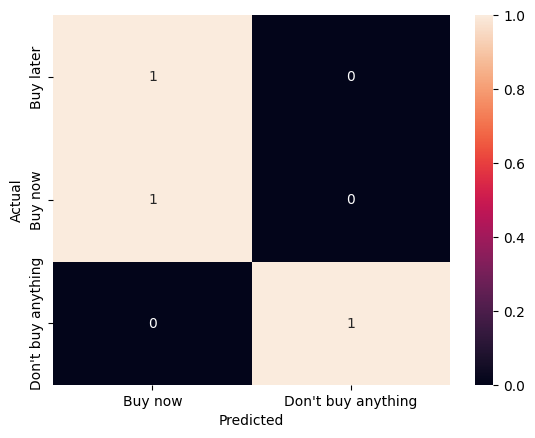

In [ ]:
conf_mat = pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)